<a href="https://www.kaggle.com/code/zainhana/predict-house-price?scriptVersionId=95205776" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [55]:
!pip install dataframe-image

In [54]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import metrics as ms
import dataframe_image as dfi


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

pd.set_option('Max_columns',90)
pd.set_option('Max_rows',1600)



# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

ModuleNotFoundError: No module named 'dataframe_image'

##Reading Data

In [2]:
train = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")
test = pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv")

In [3]:
print("Train shape : {} \n".format(train.shape))
print("Test shape : {}".format(test.shape))

Train shape : (1460, 81) 

Test shape : (1459, 80)


In [4]:
#Cheking the different column headings both of train and test data

df_train = [x for x in train if x not in test]
print ("Column present in train but not in test is {} \n".format(df_train))

df_test = [x for x in test if x not in train]
print ("Column present in test but not in train is {} \n".format(df_test))

Column present in train but not in test is ['SalePrice'] 

Column present in test but not in train is [] 



In [52]:
train.head(10)

pd.savetoimg(train.head(10))

AttributeError: module 'pandas' has no attribute 'savetoimg'

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<AxesSubplot:>

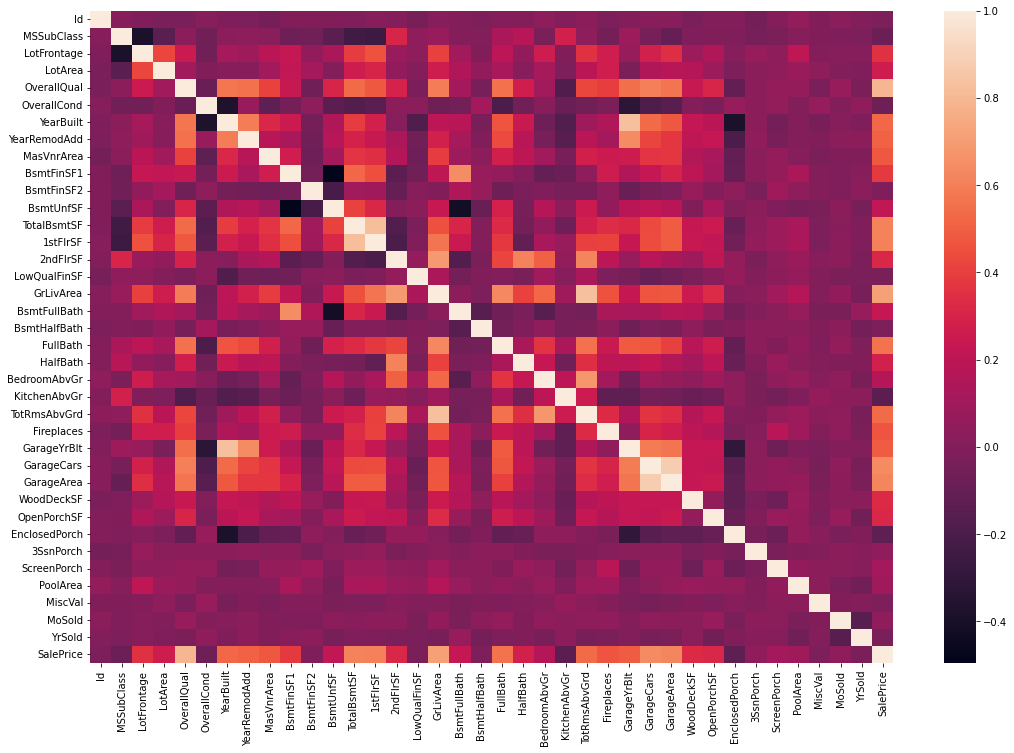

In [7]:
corrmat = train.corr()
plt.subplots(figsize=(18,12))
sns.heatmap(corrmat, vmax = 1,square = False)

In [8]:
# Drop the 'ID' column for the train set
train.drop(['Id'], axis = 1,inplace= True)

#Save the 'ID' column before dropping from test set
test_id = test['Id'].tolist()
test.drop(['Id'], axis = 1,inplace= True)

#Save Sale Price column before dropping from train set
target = train['SalePrice']
train.drop(['SalePrice'], axis=1, inplace = True)

In [9]:
#combine training data and test data
data0= pd.concat((train, test), ignore_index=True)
data0.shape

(2919, 79)

<AxesSubplot:>

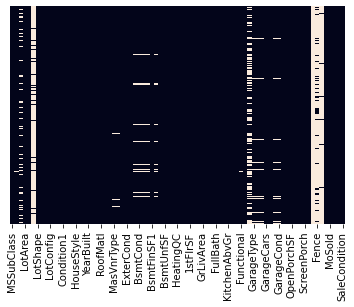

In [10]:
#Check data kosong
sns.heatmap(data0.isnull(),yticklabels = False, cbar = False)

# #Cleaning

In [11]:
data0.shape

(2919, 79)

In [12]:
data0.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2917.000000,2917.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2760.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,560.772104,1051.777587,1159.581706,336.483727,4.694416,1500.759849,0.429894,0.061364,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,1978.113406,1.766621,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737
std,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,439.543659,440.766258,392.362079,428.701456,46.396825,506.051045,0.524736,0.245687,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,25.574285,0.761624,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,467.000000,989.500000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,805.500000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [13]:
data0.isna().sum().sort_values(ascending = False)

PoolQC           2909
MiscFeature      2814
Alley            2721
Fence            2348
FireplaceQu      1420
LotFrontage       486
GarageYrBlt       159
GarageFinish      159
GarageQual        159
GarageCond        159
GarageType        157
BsmtExposure       82
BsmtCond           82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MasVnrType         24
MasVnrArea         23
MSZoning            4
Functional          2
BsmtHalfBath        2
BsmtFullBath        2
Utilities           2
SaleType            1
BsmtFinSF1          1
KitchenQual         1
GarageCars          1
BsmtUnfSF           1
TotalBsmtSF         1
Exterior2nd         1
Exterior1st         1
GarageArea          1
Electrical          1
BsmtFinSF2          1
TotRmsAbvGrd        0
Fireplaces          0
MSSubClass          0
BedroomAbvGr        0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal   

In [14]:
def miss_df(df,ascending):
    
    Missing_count = df.isna().sum().sort_values(ascending=ascending)
    Missing_count = Missing_count[df.isna().sum().sort_values(ascending=ascending)!= 0]
    
    Percentage = (df.isna().sum().sort_values(ascending=ascending)/len(df)*100)[
        (df.isna().sum().sort_values(ascending=ascending)/len(df)*100) !=0
    ]
    
    return pd.concat([Missing_count,Percentage],axis=1,keys=['Missing_Count','Percentage'])

def miss_plot(df):
    fig,ax = plt.subplots(figsize=(20,10))
    sns.barplot(data=df,x=df.index,y='Percentage',palette='winter')
    plt.axhline(y= len(df)/4, linewidth = 1.5, color= 'red')
    plt.xticks(rotation=90)
    plt.show()

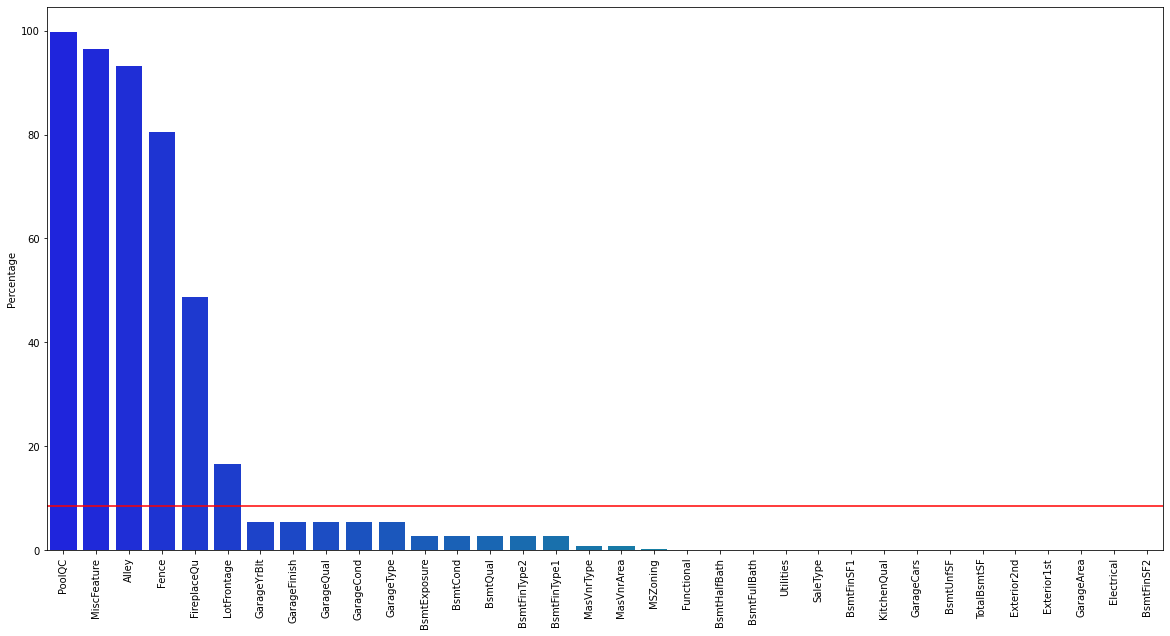

In [15]:
Missing_columns = miss_df(data0,False)
miss_plot(Missing_columns)

#Drop column that has:

1. Alot of null values will not be affect to our model
2. is compined from other columns

In [16]:
# datanull = [data0.isna().sum().sort_values(ascending = False)]
# for x in datanull:
    


In [17]:
#drop alot of null values
data0.drop(['Alley','PoolQC','Fence','MiscFeature','FireplaceQu'],axis = 1, inplace = True)
data0.shape

(2919, 74)

In [18]:
data0.isna().sum().sort_values(ascending = False)

LotFrontage      486
GarageQual       159
GarageYrBlt      159
GarageFinish     159
GarageCond       159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
Functional         2
BsmtHalfBath       2
BsmtFullBath       2
Utilities          2
GarageArea         1
BsmtFinSF2         1
BsmtFinSF1         1
GarageCars         1
TotalBsmtSF        1
SaleType           1
KitchenQual        1
Electrical         1
Exterior2nd        1
Exterior1st        1
BsmtUnfSF          1
KitchenAbvGr       0
TotRmsAbvGrd       0
BedroomAbvGr       0
HalfBath           0
FullBath           0
MoSold             0
YrSold             0
MiscVal            0
PoolArea           0
ScreenPorch        0
Fireplaces         0
3SsnPorch          0
EnclosedPorch      0
OpenPorchSF        0
WoodDeckSF         0
PavedDrive         0
MSSubClass         0
Heating            0
GrLivArea    

In [19]:
data0[data0.Utilities.isna()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1915,30,NaN,109.0,21780,Grvl,Reg,Lvl,NaN,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,2,4,1910,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,Fa,CBlock,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,N,FuseA,810,0,0,810,0.0,0.0,1,0,1,1,TA,4,Min1,0,Detchd,1975.0,Unf,1.0,280.0,TA,TA,N,119,24,0,0,0,0,0,3,2009,ConLD,Normal
1945,20,RL,NaN,31220,Pave,IR1,Bnk,NaN,FR2,Gtl,Gilbert,Feedr,Norm,1Fam,1Story,6,2,1952,1952,Hip,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,1632.0,1632.0,GasA,TA,Y,FuseA,1474,0,0,1474,0.0,0.0,1,0,3,1,TA,7,Min2,2,Attchd,1952.0,Unf,2.0,495.0,TA,TA,Y,0,0,144,0,0,0,750,5,2008,WD,Normal


In [20]:
## if we see, Total BsmtSF is total from 3 other columns

print (data0[['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']].head())

data0.drop(['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF'], axis = 1, inplace = True)
data0.shape

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF
0       706.0         0.0      150.0        856.0
1       978.0         0.0      284.0       1262.0
2       486.0         0.0      434.0        920.0
3       216.0         0.0      540.0        756.0
4       655.0         0.0      490.0       1145.0


(2919, 70)

In [21]:
#mengganti object dengan angka
ordinal_cols = {
    'GarageFinish' : {'Fin':3,'RFn':2,'Unf':1},
    'GarageQual' : {'Ex':6,'Gd':5,'TA':4,'Fa':3,'Po':2,'NA':1},
    'GarageCond' : {'Ex':6,'Gd':5,'TA':4,'Fa':3,'Po':2,'NA':1},
    'BsmtExposure' : {'Gd':5,'Av':4,'Mn':3,'No':2,'NA':1},
    'BsmtCond' : {'Ex':6,'Gd':5,'TA':4,'Fa':3,'Po':2,'NA':1},
    'BsmtQual': {'Ex':6,'Gd':5,'TA':4,'Fa':3,'Po':2,'NA':1},
    'BsmtFinType1' : {'GLQ':7,'ALQ':6,'BLQ':5,'Rec':4,'LwQ':3,'Unf':2,'NA':1},
    'BsmtFinType2' : {'GLQ':7,'ALQ':6,'BLQ':5,'Rec':4,'LwQ':3,'Unf':2,'NA':1},
    'Utilities' : {'AllPub':4,'NoSewr':3,'NoSeWa':2,'ELO':1}
}

data0.replace(ordinal_cols, inplace = True)
# data0['GarageFinish'].head()

In [22]:
data0[data0['Utilities'].isna()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1915,30,NaN,109.0,21780,Grvl,Reg,Lvl,NaN,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,2,4,1910,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,Fa,CBlock,NaN,NaN,NaN,NaN,NaN,GasA,TA,N,FuseA,810,0,0,810,0.0,0.0,1,0,1,1,TA,4,Min1,0,Detchd,1975.0,1.0,1.0,280.0,4.0,4.0,N,119,24,0,0,0,0,0,3,2009,ConLD,Normal
1945,20,RL,NaN,31220,Pave,IR1,Bnk,NaN,FR2,Gtl,Gilbert,Feedr,Norm,1Fam,1Story,6,2,1952,1952,Hip,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,CBlock,4.0,4.0,2.0,2.0,2.0,GasA,TA,Y,FuseA,1474,0,0,1474,0.0,0.0,1,0,3,1,TA,7,Min2,2,Attchd,1952.0,1.0,2.0,495.0,4.0,4.0,Y,0,0,144,0,0,0,750,5,2008,WD,Normal


# Fill null values

In [23]:
numerical_features = [features for features in data0.columns if data0[features].dtypes =='int' 
                      or data0[features].dtypes == 'float']

object_features = [features for features in data0.columns if data0[features].dtypes == 'o']
a = [x for x in data0[numerical_features] if data0[x].isna().sum() > 0]
print(a, '\n banyak kolom numerik kosong:',len(a[:]),' dari total', len(data0.columns),'\n')

b = [x for x in data0[object_features] if data0[x].isna().sum() > 0]
print(b,'\n banyak kolom object kosong :',len(b[:]),' dari total', len(data0.columns))

['LotFrontage', 'Utilities', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond'] 
 banyak kolom numerik kosong: 16  dari total 70 

[] 
 banyak kolom object kosong : 0  dari total 70


In [24]:
#mencari modus kolom numerik kosong
numerical_features = [features for features in data0.columns if data0[features].dtypes =='int' 
                      or data0[features].dtypes == 'float']
data0[numerical_features].fillna(data0[numerical_features].mode(),inplace=True)
data0[numerical_features].isna().sum().sort_values(ascending = False)

LotFrontage      486
GarageFinish     159
GarageQual       159
GarageCond       159
GarageYrBlt      159
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrArea        23
BsmtFullBath       2
BsmtHalfBath       2
Utilities          2
GarageArea         1
GarageCars         1
3SsnPorch          0
ScreenPorch        0
PoolArea           0
EnclosedPorch      0
OpenPorchSF        0
WoodDeckSF         0
MiscVal            0
MoSold             0
MSSubClass         0
FullBath           0
Fireplaces         0
TotRmsAbvGrd       0
KitchenAbvGr       0
BedroomAbvGr       0
HalfBath           0
GrLivArea          0
LowQualFinSF       0
2ndFlrSF           0
1stFlrSF           0
YearRemodAdd       0
YearBuilt          0
OverallCond        0
OverallQual        0
LotArea            0
YrSold             0
dtype: int64

In [25]:
# mengisi data kosong dengan modus
cat_mode = [
    'GarageFinish','GarageQual','GarageCond','BsmtExposure','BsmtQual','BsmtFinType2',
    'BsmtFinType1','Utilities','LotFrontage','GarageYrBlt','MasVnrArea','BsmtHalfBath',
    'BsmtFullBath','GarageCars','GarageArea'
]

for x in cat_mode :
    data0[x].fillna(data0[x].mode()[0],inplace=True)

#mengisi data kosong dengan None
cat_None_cols =  [
    'GarageType',
    'BsmtCond',
    'MasVnrType',
    'MSZoning', 
    'Electrical',
    'KitchenQual',
    'Functional',
    'Exterior1st',
    'Exterior2nd',
    'SaleType']
for col in cat_None_cols:
    data0[col].fillna('None',inplace = True)

In [26]:
data0.isna().sum().sort_values(ascending= False)

MSSubClass       0
HalfBath         0
Fireplaces       0
Functional       0
TotRmsAbvGrd     0
KitchenQual      0
KitchenAbvGr     0
BedroomAbvGr     0
FullBath         0
GarageYrBlt      0
BsmtHalfBath     0
BsmtFullBath     0
GrLivArea        0
LowQualFinSF     0
2ndFlrSF         0
1stFlrSF         0
GarageType       0
GarageFinish     0
MSZoning         0
3SsnPorch        0
SaleType         0
YrSold           0
MoSold           0
MiscVal          0
PoolArea         0
ScreenPorch      0
EnclosedPorch    0
GarageCars       0
OpenPorchSF      0
WoodDeckSF       0
PavedDrive       0
GarageCond       0
GarageQual       0
GarageArea       0
Electrical       0
CentralAir       0
HeatingQC        0
LandSlope        0
OverallQual      0
HouseStyle       0
BldgType         0
Condition2       0
Condition1       0
Neighborhood     0
LotConfig        0
Heating          0
Utilities        0
LandContour      0
LotShape         0
Street           0
LotArea          0
LotFrontage      0
OverallCond 

In [27]:
data0.select_dtypes('number').isna().sum().sort_values(ascending= False)

MSSubClass       0
LotFrontage      0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
BedroomAbvGr     0
HalfBath         0
FullBath         0
BsmtQual         0
LotArea          0
Utilities        0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtExposure     0
BsmtHalfBath     0
BsmtFinType1     0
BsmtFinType2     0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
YrSold           0
dtype: int64

In [28]:
object_features = [features for features in data0.columns if data0[features].dtypes =='o']

a = [x for x in data0[object_features] if data0[x].isna().sum() > 0]
print('\n banyak kolom object kosong:',len(a[:]),'dari total', len(data0.columns))
b = [x for x in data0[numerical_features] if data0[x].isna().sum() > 0]
print('\n banyak kolom numerik kosong:',len(b[:]),'dari total', len(data0.columns))
# data0[numerical_features].isna().sum().sort_values(ascending= False)


 banyak kolom object kosong: 0 dari total 70

 banyak kolom numerik kosong: 0 dari total 70


In [29]:
data0['MasVnrType'].dtype

dtype('O')

In [30]:
data0.isna().sum().sort_values(ascending=False)

MSSubClass       0
HalfBath         0
Fireplaces       0
Functional       0
TotRmsAbvGrd     0
KitchenQual      0
KitchenAbvGr     0
BedroomAbvGr     0
FullBath         0
GarageYrBlt      0
BsmtHalfBath     0
BsmtFullBath     0
GrLivArea        0
LowQualFinSF     0
2ndFlrSF         0
1stFlrSF         0
GarageType       0
GarageFinish     0
MSZoning         0
3SsnPorch        0
SaleType         0
YrSold           0
MoSold           0
MiscVal          0
PoolArea         0
ScreenPorch      0
EnclosedPorch    0
GarageCars       0
OpenPorchSF      0
WoodDeckSF       0
PavedDrive       0
GarageCond       0
GarageQual       0
GarageArea       0
Electrical       0
CentralAir       0
HeatingQC        0
LandSlope        0
OverallQual      0
HouseStyle       0
BldgType         0
Condition2       0
Condition1       0
Neighborhood     0
LotConfig        0
Heating          0
Utilities        0
LandContour      0
LotShape         0
Street           0
LotArea          0
LotFrontage      0
OverallCond 

In [31]:
a = data0[['LotFrontage','GarageYrBlt','GarageFinish','GarageQual','GarageCond','GarageType',
           'BsmtExposure','BsmtQual','BsmtCond','BsmtFinType2','BsmtFinType1','MasVnrType',
           'MasVnrArea','MSZoning','Utilities']].dtypes
b = data0[['LotFrontage','GarageYrBlt','GarageFinish','GarageQual','GarageCond','GarageType',
           'BsmtExposure','BsmtQual','BsmtCond','BsmtFinType2','BsmtFinType1','MasVnrType',
           'MasVnrArea','MSZoning','Utilities']]
print(a,'\n')

for x in b:
    print(x,':',len(data0[x].unique()))
    

LotFrontage     float64
GarageYrBlt     float64
GarageFinish    float64
GarageQual      float64
GarageCond      float64
GarageType       object
BsmtExposure    float64
BsmtQual        float64
BsmtCond         object
BsmtFinType2    float64
BsmtFinType1    float64
MasVnrType       object
MasVnrArea      float64
MSZoning         object
Utilities       float64
dtype: object 

LotFrontage : 128
GarageYrBlt : 103
GarageFinish : 3
GarageQual : 5
GarageCond : 5
GarageType : 7
BsmtExposure : 4
BsmtQual : 4
BsmtCond : 5
BsmtFinType2 : 6
BsmtFinType1 : 6
MasVnrType : 4
MasVnrArea : 444
MSZoning : 6
Utilities : 2


In [32]:
#fill none column with modus
# for column in ['LotFrontage','GarageYrBlt','GarageFinish','MasVnrType','MasVnrArea','MSZoning'] :
#     data0[column] = data0[column].fillna(data0[column].mode(),inplace=True)

In [33]:
from sklearn.preprocessing import LabelEncoder

mapping = LabelEncoder()
data0['MasVnrType'] = mapping.fit_transform(data0['MasVnrType'])
data0['MSZoning'] = mapping.fit_transform(data0['MSZoning'])
data0[['MasVnrType','MSZoning']].head()
data0[['MasVnrType','MSZoning']].isna().sum()

MasVnrType    0
MSZoning      0
dtype: int64

In [34]:
x = ['Utilities','Functional','Electrical','Exterior2nd','KitchenQual','Exterior1st','SaleType']

for col in x:
    print (data0[col].dtypes)

float64
object
object
object
object
object
object


In [35]:
data0.isna().sum().sort_values(ascending=False)

MSSubClass       0
HalfBath         0
Fireplaces       0
Functional       0
TotRmsAbvGrd     0
KitchenQual      0
KitchenAbvGr     0
BedroomAbvGr     0
FullBath         0
GarageYrBlt      0
BsmtHalfBath     0
BsmtFullBath     0
GrLivArea        0
LowQualFinSF     0
2ndFlrSF         0
1stFlrSF         0
GarageType       0
GarageFinish     0
MSZoning         0
3SsnPorch        0
SaleType         0
YrSold           0
MoSold           0
MiscVal          0
PoolArea         0
ScreenPorch      0
EnclosedPorch    0
GarageCars       0
OpenPorchSF      0
WoodDeckSF       0
PavedDrive       0
GarageCond       0
GarageQual       0
GarageArea       0
Electrical       0
CentralAir       0
HeatingQC        0
LandSlope        0
OverallQual      0
HouseStyle       0
BldgType         0
Condition2       0
Condition1       0
Neighborhood     0
LotConfig        0
Heating          0
Utilities        0
LandContour      0
LotShape         0
Street           0
LotArea          0
LotFrontage      0
OverallCond 

<AxesSubplot:>

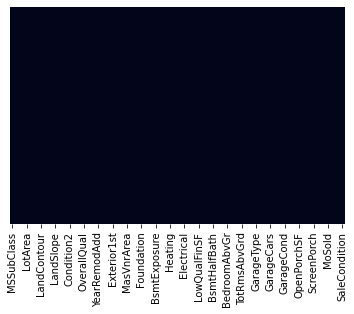

In [36]:
sns.heatmap(data0.isnull(),yticklabels = False, cbar = False)

# Target Transformation

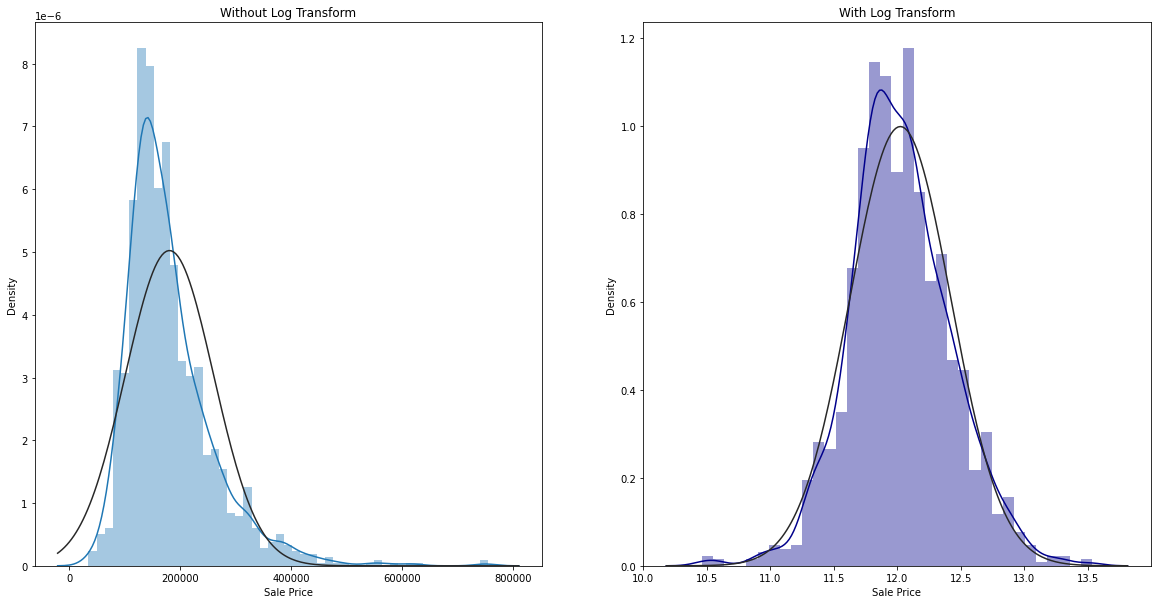

In [37]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
sns.distplot(target, kde=True, fit=scipy.stats.norm)
plt.xlabel("Sale Price")
plt.title("Without Log Transform")

plt.subplot(1, 2, 2)
sns.distplot(np.log1p(target), kde=True, fit=scipy.stats.norm,color='darkblue')
plt.xlabel("Sale Price")
plt.title("With Log Transform")

plt.show()

In [38]:
target_log = np.log(target)

# Encoding Categorical Column

In [39]:
data1 = data0.copy()

data1 = pd.get_dummies(data1)
data1

,MSSubClass,MSZoning,LotFrontage,LotArea,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrType,MasVnrArea,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinType2,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Street_Grvl,Street_Pave,LotShape_IR1,...,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_None,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_None,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_None,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_None,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,4,65.0,8450,4.0,7,5,2003,2003,1,196.0,5.0,2.0,7.0,2.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,2.0,548.0,4.0,4.0,0,61,0,0,0,0,0,2,2008,0,1,0,...,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,20,4,80.0,9600,4.0,6,8,1976,1976,2,0.0,5.0,5.0,6.0,2.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,2.0,460.0,4.0,4.0,298,0,0,0,0,0,0,5,2007,0,1,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,60,4,68.0,11250,4.0,7,5,2001,2002,1,162.0,5.0,3.0,7.0,2.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2001.0,2.0,2.0,608.0,4.0,4.0,0,42,0,0,0,0,0,9,2008,0,1,1,...,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,70,4,60.0,9550,4.0,7,5,1915,1970,2,0.0,4.0,2.0,6.0,2.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,1998.0,1.0,3.0,642.0,4.0,4.0,0,35,272,0,0,0,0,2,2006,0,1,1,...,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,60,4,84.0,14260,4.0,8,5,2000,2000,1,350.0,5.0,4.0,7.0,2.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,2000.0,2.0,3.0,836.0,4.0,4.0,192,84,0,0,0,0,0,12,2008,0,1,1,...,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,5,21.0,1936,4.0,4,7,1970,1970,2,0.0,4.0,2.0,2.0,2.0,546,546,0,1092,0.0,0.0,1,1,3,1,5,0,2005.0,1.0,0.0,0.0,4.0,4.0,0,0,0,0,0,0,0,6,2006,0,1,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2915,160,5,21.0,1894,4.0,4,5,1970,1970,2,0.0,4.0,2.0,4.0,2.0,546,546,0,1092,0.0,0.0,1,1,3,1,6,0,1970.0,1.0,1.0,286.0,4.0,4.0,0,24,0,0,0,0,0,4,2006,0,1,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
2916,20,4,160.0,20000,4.0,5,7,1960,1996,2,0.0,4.0,2.0,6.0,2.0,1224,0,0,1224,1.0,0.0,1,0,4,1,7,1,1960.0,1.0,2.0,576.0,4.0,4.0,474,0,0,0,0,0,0,9,2006,0,1,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
2917,85,4,62.0,10441,4.0,5,5,1992,1992,2,0.0,5.0,4.0,7.0,2.0,970,0,0,970,0.0,1.0,1,0,3,1,6,0,2005.0,1.0,0.0,0.0,4.0,4.0,80,32,0,0,0,0,700,7,2006,0,1,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


# Scaling

In [40]:
from sklearn.preprocessing import MinMaxScaler

In [41]:
scaler = MinMaxScaler()
data1 = pd.DataFrame(scaler.fit_transform(data1), columns = data1.columns)
data1.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrType,MasVnrArea,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinType2,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Street_Grvl,Street_Pave,LotShape_IR1,...,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_None,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_None,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_None,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_None,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.235294,0.8,0.150685,0.033420,1.0,0.666667,0.500,0.949275,0.883333,0.333333,0.12250,0.666667,0.000000,1.0,0.0,0.109641,0.413559,0.0,0.259231,0.333333,0.0,0.50,0.5,0.375,0.333333,0.461538,0.00,0.346154,0.5,0.4,0.368280,0.5,0.5,0.000000,0.082210,0.000000,0.0,0.0,0.0,0.0,0.090909,0.50,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000000,0.8,0.202055,0.038795,1.0,0.555556,0.875,0.753623,0.433333,0.666667,0.00000,0.666667,1.000000,0.8,0.0,0.194917,0.000000,0.0,0.174830,0.000000,0.5,0.50,0.0,0.375,0.333333,0.307692,0.25,0.259615,0.5,0.4,0.309140,0.5,0.5,0.209270,0.000000,0.000000,0.0,0.0,0.0,0.0,0.363636,0.25,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.235294,0.8,0.160959,0.046507,1.0,0.666667,0.500,0.934783,0.866667,0.333333,0.10125,0.666667,0.333333,1.0,0.0,0.123083,0.419370,0.0,0.273549,0.333333,0.0,0.50,0.5,0.375,0.333333,0.307692,0.25,0.339744,0.5,0.4,0.408602,0.5,0.5,0.000000,0.056604,0.000000,0.0,0.0,0.0,0.0,0.727273,0.50,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.294118,0.8,0.133562,0.038561,1.0,0.666667,0.500,0.311594,0.333333,0.666667,0.00000,0.333333,0.000000,0.8,0.0,0.131695,0.366102,0.0,0.260550,0.333333,0.0,0.25,0.0,0.375,0.333333,0.384615,0.25,0.330128,0.0,0.6,0.431452,0.5,0.5,0.000000,0.047170,0.268775,0.0,0.0,0.0,0.0,0.090909,0.00,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.235294,0.8,0.215753,0.060576,1.0,0.777778,0.500,0.927536,0.833333,0.333333,0.21875,0.666667,0.666667,1.0,0.0,0.170342,0.509927,0.0,0.351168,0.333333,0.0,0.50,0.5,0.500,0.333333,0.538462,0.25,0.336538,0.5,0.6,0.561828,0.5,0.5,0.134831,0.113208,0.000000,0.0,0.0,0.0,0.0,1.000000,0.50,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


# Split

In [42]:
train_final = data1.loc[:train.index.max(), :].copy()
test_final = data1.loc[train.index.max() + 1:, :].reset_index(drop=True).copy()

In [43]:
print('train final {} \n'.format(train_final.shape))
print('test final {}'.format(test_final.shape))

train final (1460, 240) 

test final (1459, 240)


In [44]:
target_log.shape

(1460,)

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_val, y_train, y_val =train_test_split(train_final, target_log,train_size=0.8, test_size=0.2,random_state=0)

X_train.shape,X_val.shape,y_train.shape,y_val.shape

((1168, 240), (292, 240), (1168,), (292,))

In [47]:
print('train final {} \n'.format(train_final.shape))
print('test final {}'.format(test_final.shape))

train final (1460, 240) 

test final (1459, 240)


In [48]:
forest_model = RandomForestRegressor(n_estimators=500, max_depth=10)
forest_model.fit(X_train, y_train)
predicted_random_forest = forest_model.predict(X_val)
forest_model.score(X_train,y_train)
print('RMSE:', mean_squared_error(np.log(y_val), np.log(predicted_random_forest),squared=False))

RMSE: 0.011603359890651914


In [49]:
# forest_preds = forest_model.predict(test_final)

In [50]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_val, predicted_random_forest))
print('Mean Squared Error:', metrics.mean_squared_error(y_val, predicted_random_forest))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, predicted_random_forest)))

Mean Absolute Error: 0.0937369271784719
Mean Squared Error: 0.01970551391521283
Root Mean Squared Error: 0.1403763296115582


In [51]:
# submission = pd.concat([test_id, pd.Series(forest_preds, name='SalePrice')], axis=1)
# # submission.to_csv('submission.csv', index=False, header=True)
# submission

preds_test = forest_model.predict(test_final)

# Save test predictions to submission file
output = pd.DataFrame({'Id': test_id,
                       'SalePrice': preds_test})
output.to_csv('submission.csv', index=False)
output.head()

,Id,SalePrice
0,1461,11.716914
1,1462,11.906970
2,1463,12.092116
3,1464,12.105572
4,1465,12.186862
